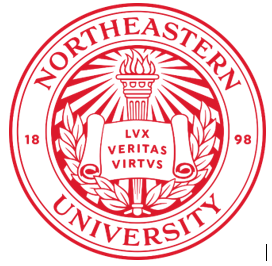


 <h1><center> Northeastern University </center></h1>
 <h1><center> College of Professional Studies </center></h1>
 <h1><center> ALY6020 81941 Predictive Analytics Sec 03 </center></h1>
 <h1><center> Spring 2020 CPS Quarter – Second Half </center></h1>
 <h1><center> Project: Tweet Sentiment Extraction.</center></h1>
 <h1><center> Instructor: Dr. Marco Montes de Oca</center></h1>
 <h1><center> Date: 6/25/2020</center></h1>
 <h1><center> Team Members: Priyanka Nagesh Adiga, Anubhav Saha</h1>

 <br>

<h2> Introduction </h2>

<p> &emsp;&emsp; Today we see many tweets circulating over Twitter feeds. With so many tweets circulating, at times it becomes difficult to determine whether the sentiment behind a specific tweet by a user will positively impact a company, or a person's brand for being viral (positive), or negatively impact the company by losing the shareholder confidence because it strikes a negative tone. Thus, it is important to understand the sentiment behind a certain message or a tweet. In this project we have decided to analyze these tweets for their sentiments. The tweets are classified into three labels namely positive, negative, and neutral and we have to analyze the tweet and determine the phrase or the word that is responsible for the associated sentiment label. The dataset on which we will be performing this predictive analysis on is retrieved from one of the featured Active Kaggle competitions. [1] </p>

<p> &emsp;&emsp; The tweet sentiment extraction dataset consists of four columns, namely text ID, text, sentiment, and lastly selected text. Each row of the dataset consists of text of a tweet and an associated sentiment label. Furthermore, in the training dataset we are provided with a word or a phrase that is typically drawn from  the tweet itself,  named ‘select text’ that encapsulates the sentiment provided. The description of each of these columns is as given below. 
Text ID -An unique ID, that identified each piece of text
text - the text description or the text of the tweet
sentiment - the general sentiment of the tweet
selected_text - the text that supports the tweet's sentiment(this attribute is available in train data set alone)
.</p>


In [19]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cwd = os.getcwd()
cwd

'D:\\ALY6020 81941 Predictive Analytics SEC 03 Spring 2020 CPS [VTC-B-HY] ALY6020.81941.202035\\Project'

In [5]:
#importing the text dataset in the form of dataframes
tweet_train = pd.read_csv("train.csv")
tweet_test = pd.read_csv("test.csv")
tweet_submission = pd.read_csv("sample_submission.csv")


In [6]:
#determining the shape of the data

print("Shape of Training Set:",tweet_train.shape)
print("Shape of Test Set:",tweet_test.shape)

Shape of Training Set: (27481, 4)
Shape of Test Set: (3534, 3)


In [7]:
#extracting information about training data
tweet_train.dropna(inplace=True)
tweet_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27480 entries, 0 to 27480
Data columns (total 4 columns):
textID           27480 non-null object
text             27480 non-null object
selected_text    27480 non-null object
sentiment        27480 non-null object
dtypes: object(4)
memory usage: 1.0+ MB


In [8]:
#extracting information about test data

tweet_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 3 columns):
textID       3534 non-null object
text         3534 non-null object
sentiment    3534 non-null object
dtypes: object(3)
memory usage: 83.0+ KB


In [9]:
tweet_train.dropna(inplace=True)
tweet_train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [10]:
tweet_test.head()

,textID,text,sentiment
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative
3,01082688c6,happy bday!,positive
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive


In [11]:
tweet_train.describe()

,textID,text,selected_text,sentiment
count,27480,27480,27480,27480
unique,27480,27480,22463,3
top,c123f197ec,HAPPY MOTHERS DAY MARK,good,neutral
freq,1,1,199,11117


In [12]:
tweet_test.describe()

,textID,text,sentiment
count,3534,3534,3534
unique,3534,3534,3
top,7eb1620dec,Who To Say Hi To And Who To Buy A Shot To. Lo...,neutral
freq,1,1,1430


In [13]:
#Looking at the distrubution of the dataset

dist_train = tweet_train.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
dist_train.style.background_gradient(cmap='Blues')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7781


Text(0.5, 1.0, 'Count of Test class labels')

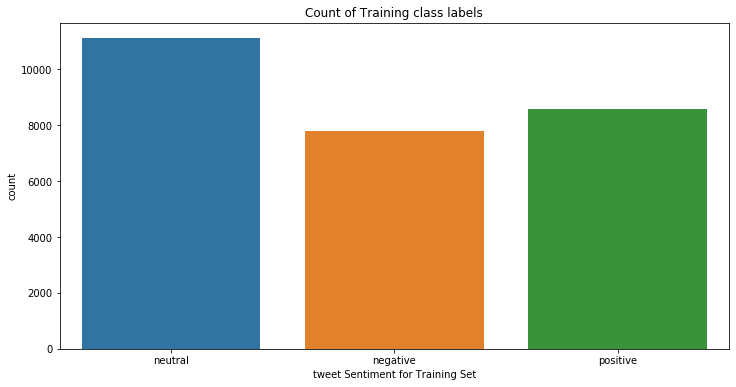

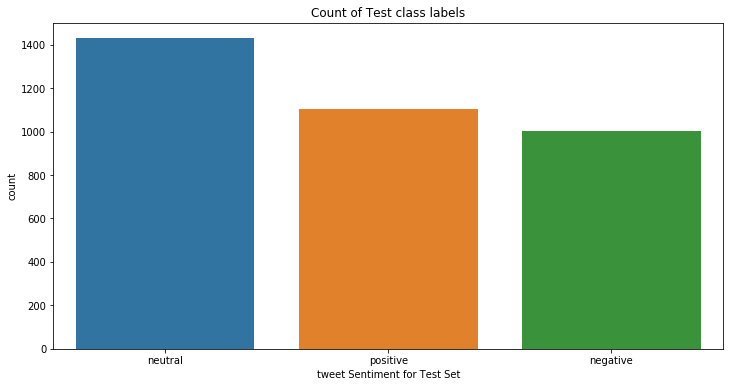

In [14]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=tweet_train)
plt.xlabel('tweet Sentiment for Training Set')
plt.title('Count of Training class labels')

plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=tweet_test)
plt.xlabel('tweet Sentiment for Test Set')
plt.title('Count of Test class labels')


In [56]:
tweet_train['Num_words_text'] = tweet_train['text'].apply(lambda x:len(str(x).split())) #Number Of words in main Text in train set

In [15]:
tweet_train

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [54]:
train_df, test_df = train_test_split(tweet_train, test_size=0.2, random_state=0)

In [55]:
train_df

,textID,text,selected_text,sentiment
24567,a5ca70509c,Cant stop playin` in my head -- pussycat doll...,Cant stop playin` in my head -- pussycat doll...,neutral
24619,f18b75e863,I hate you,I hate you,negative
19766,649e31adcc,Starbucks I`m lovin` it,Starbucks I`m lovin` it,positive
21737,8891d08a8c,Ben and Jerry...yummmmy!!!,.yummmmy!,positive
8980,7fb24b4a56,wow.. purple leopard skin. fieeerrceee..,wow.. purple leopard skin. fieeerrceee..,neutral
...,...,...,...,...
13124,e68247e3f8,...thanks for the shout out...you might be ri...,.thanks,positive
19649,b250e64704,"Im going in now, it looks like the sun has gone","Im going in now, it looks like the sun has gone",neutral
9846,84e69a3f34,I am soooo saying this phrase now 'Stop be so ...,I am soooo saying this phrase now 'Stop be so ...,neutral
10800,5b34b39a42,Morning all and its a lovely day at last,lovely day,positive


In [56]:
test_df

,textID,text,selected_text,sentiment
20673,3391184efc,loves the nice weather and 7:30 exams,loves,positive
12581,b35daf9677,"Okay, this weather isn`t 'cute sundress' frien...","Okay, this weather isn`t 'cute sundress' frien...",neutral
13136,06e5249859,Woo hoo!! Congratulations,Congratulations,positive
14013,3cd4960670,thanks got a hold of someone there who knew...,thanks,positive
25030,92b75314ca,Got back and putting in the laundry. We got in...,Got back and putting in the laundry. We got in...,neutral
...,...,...,...,...
10340,25cf98f210,Not feeling comfortable with myself today,Not feeling comfortable,negative
3867,55c4fea474,And it`s starting to get cold,And it`s starting to get cold,neutral
9813,6baa2b379f,_Pritchard how come i dont see more of u? how ...,im sad,negative
16998,c0b19d85bd,_a_hart ah.. Birmingham! I remember being ther...,_a_hart ah.. Birmingham! I remember being ther...,neutral


In [18]:
from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

In [1]:
#This Function Saves model to given output directory'''
def saving_model(output_directory, nlp, new_model_name):
  
    output_directory = f'../working/{output_dir}'
    if output_directory is not None:        
        if not os.path.exists(output_directory):
            os.makedirs(output_directory)
        nlp.meta["name"] = new_model_name
        nlp.to_disk(output_directory)
        print("Saved model to", output_dir)

In [2]:
# pass model = nlp if you want to train on top of existing model 

def train_model(train_data, output_directory, n_iteration=20, model=None):
    """Load the model, set up the pipeline and train the entity recognizer."""
    ""
    if model is not None:
        nlp = spacy.load(output_directory)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")  # create blank Language class
        print("Created blank 'en' model")
    
    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if "ner" not in nlp.pipe_names:
        ner = nlp.create_pipe("ner")
        nlp.add_pipe(ner, last=True)
    # otherwise, get it so we can add labels
    else:
        ner = nlp.get_pipe("ner")
    
    # add labels
    for _, annotations in train_data:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        # sizes = compounding(1.0, 4.0, 1.001)
        # batch up the examples using spaCy's minibatch
        if model is None:
            nlp.begin_training()
        else:
            nlp.resume_training()

        for itn in tqdm(range(n_iteration)):
            random.shuffle(train_data)
            batches = minibatch(train_data, size=compounding(4.0, 500.0, 1.001))    
            losses = {}
            for batch in batches:
                texts, annotations = zip(*batch)
                nlp.update(
                    texts,  # batch of texts
                    annotations,  # batch of annotations
                    drop=0.5,   # dropout - make it harder to memorise data
                    losses=losses, 
                )
            
            print("Losses", losses)
    save_model(output_directory, nlp, 'st_ner')

In [3]:
def getting_model_output_path(sentiment):
    getting_model_output_path = None
    if sentiment == 'positive':
        getting_model_output_path = 'models/model_pos'
    elif sentiment == 'negative':
        getting_model_output_path = 'models/model_neg'
    else:
        getting_model_output_path = 'models/model_neu'
    return getting_model_output_path
    

In [60]:
## creating data in spacy data input format

def get_training_data(sentiment):
    train_data = []
    for index, row in train_df.iterrows():
        if row.sentiment == sentiment:
            selected_text = row.selected_text
            text = row.text
            start = text.find(selected_text)
            end = start + len(selected_text)
            train_data.append((text, {"entities": [[start, end, 'selected_text']]}))
    return train_data

In [61]:
sentiment = 'positive'

train_data = get_training_data(sentiment)
model_path = getting_model_output_path(sentiment)
# For DEmo Purposes I have taken 3 iterations you can train the model as you want
train_model(train_data, model_path, n_iter=3, model=None)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Created blank 'en' model


 33%|████████████████████████████                                                        | 1/3 [00:48<01:37, 48.66s/it]

Losses {'ner': 27889.954713690444}


 67%|████████████████████████████████████████████████████████                            | 2/3 [01:36<00:48, 48.52s/it]

Losses {'ner': 24768.77051265368}


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:25<00:00, 48.41s/it]

Losses {'ner': 23560.93291880376}
Saved model to ../working/models/model_pos


In [62]:
sentiment = 'negative'

train_data = get_training_data(sentiment)
model_path = getting_model_output_path(sentiment)

# for demo purpose i am just training the model for 2 iterations, feel free to experiment.
train_model(train_data, model_path, n_iter=3, model=None)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Created blank 'en' model


 33%|████████████████████████████                                                        | 1/3 [00:47<01:34, 47.05s/it]

Losses {'ner': 26414.177177733116}


 67%|████████████████████████████████████████████████████████                            | 2/3 [01:33<00:46, 46.81s/it]

Losses {'ner': 23150.618097415623}


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [02:22<00:00, 47.66s/it]

Losses {'ner': 22204.59627738788}
Saved model to ../working/models/model_neg


In [63]:
sentiment = 'neutral'

train_data = get_training_data(sentiment)
model_path = getting_model_output_path(sentiment)

# for demo purpose i am just training the model for 2 iterations, feel free to experiment.
train_model(train_data, model_path, n_iter=3, model=None)

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]

Created blank 'en' model


 33%|████████████████████████████                                                        | 1/3 [00:59<01:58, 59.05s/it]

Losses {'ner': 6000.174059639575}


 67%|████████████████████████████████████████████████████████                            | 2/3 [02:09<01:02, 62.40s/it]

Losses {'ner': 4260.594327683995}


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [03:25<00:00, 68.39s/it]

Losses {'ner': 4123.326756463457}
Saved model to ../working/models/model_neu


In [64]:
def text_prediction(text, model):
    doc = model(text)
    ent_array = []
    for ent in doc.ents:
        start = text.find(ent.text)
        end = start + len(ent.text)
        new_int = [start, end, ent.label_]
        if new_int not in ent_array:
            ent_array.append([start, end, ent.label_])
    selected_text = text[ent_array[0][0]: ent_array[0][1]] if len(ent_array) > 0 else text
    return selected_text

In [66]:
selected_texts = []
MODEL_PATH = 'D:/ALY6020 81941 Predictive Analytics SEC 03 Spring 2020 CPS [VTC-B-HY] ALY6020.81941.202035/working/models/'

if MODEL_PATH is not None:
    print("Loading Models  from ", MODEL_PATH)
    model_pos = spacy.load(MODEL_PATH + 'model_pos')
    model_neg = spacy.load(MODEL_PATH + 'model_neg')
    model_neu = spacy.load(MODEL_PATH + 'model_neu')
        
    for index, row in test_df.iterrows():
        text = row.text
        output_str = ""
        if row.sentiment == 'neutral':
            selected_texts.append(text_prediction(text, model_neu))
        elif row.sentiment == 'positive':
            selected_texts.append(text_prediction(text, model_pos))
        else:
            selected_texts.append(text_prediction(text, model_neg))
        
test_df['new_selected_text'] = selected_texts

Loading Models  from  D:/ALY6020 81941 Predictive Analytics SEC 03 Spring 2020 CPS [VTC-B-HY] ALY6020.81941.202035/working/models/


In [67]:
test_df

,textID,text,selected_text,sentiment,new_selected_text
20673,3391184efc,loves the nice weather and 7:30 exams,loves,positive,loves
12581,b35daf9677,"Okay, this weather isn`t 'cute sundress' frien...","Okay, this weather isn`t 'cute sundress' frien...",neutral,"Okay, this weather isn`t 'cute sundress' frien..."
13136,06e5249859,Woo hoo!! Congratulations,Congratulations,positive,Congratulations
14013,3cd4960670,thanks got a hold of someone there who knew...,thanks,positive,thanks got a hold of someone there who knew ...
25030,92b75314ca,Got back and putting in the laundry. We got in...,Got back and putting in the laundry. We got in...,neutral,Got back and putting in the laundry. We got in...
...,...,...,...,...,...
10340,25cf98f210,Not feeling comfortable with myself today,Not feeling comfortable,negative,Not feeling comfortable with myself today
3867,55c4fea474,And it`s starting to get cold,And it`s starting to get cold,neutral,And it`s starting to get cold
9813,6baa2b379f,_Pritchard how come i dont see more of u? how ...,im sad,negative,sad
16998,c0b19d85bd,_a_hart ah.. Birmingham! I remember being ther...,_a_hart ah.. Birmingham! I remember being ther...,neutral,_a_hart ah.. Birmingham! I remember being ther...


In [71]:
total_bet = test_df['selected_text'] == test_df['new_selected_text']
print(total_bet)

20673     True
12581     True
13136     True
14013    False
25030     True
         ...  
10340    False
3867      True
9813     False
16998     True
22484     True
Length: 5496, dtype: bool


In [86]:
true_values = sum(total_bet)
true_values

2756

In [75]:
df1 = test_df

In [78]:
#create new column in df1 to check if prices match
df1['Match?'] = np.where(df1['selected_text'] == df1['new_selected_text'], 'True', 'False')  
df1

,textID,text,selected_text,sentiment,new_selected_text,Match?
20673,3391184efc,loves the nice weather and 7:30 exams,loves,positive,loves,True
12581,b35daf9677,"Okay, this weather isn`t 'cute sundress' frien...","Okay, this weather isn`t 'cute sundress' frien...",neutral,"Okay, this weather isn`t 'cute sundress' frien...",True
13136,06e5249859,Woo hoo!! Congratulations,Congratulations,positive,Congratulations,True
14013,3cd4960670,thanks got a hold of someone there who knew...,thanks,positive,thanks got a hold of someone there who knew ...,False
25030,92b75314ca,Got back and putting in the laundry. We got in...,Got back and putting in the laundry. We got in...,neutral,Got back and putting in the laundry. We got in...,True
...,...,...,...,...,...,...
10340,25cf98f210,Not feeling comfortable with myself today,Not feeling comfortable,negative,Not feeling comfortable with myself today,False
3867,55c4fea474,And it`s starting to get cold,And it`s starting to get cold,neutral,And it`s starting to get cold,True
9813,6baa2b379f,_Pritchard how come i dont see more of u? how ...,im sad,negative,sad,False
16998,c0b19d85bd,_a_hart ah.. Birmingham! I remember being ther...,_a_hart ah.. Birmingham! I remember being ther...,neutral,_a_hart ah.. Birmingham! I remember being ther...,True
